In [0]:
from copy import deepcopy
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

from matplotlib import pyplot as plt
import pandas as pd
from copy import deepcopy
import numpy as np

def GoogleDriveAuth(ID):
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)
    file = drive.CreateFile({'id': ID})
    return file


File_ID = '1OMNHK9-1pVan1JttLBiAP-64fl8xhESk'
file_name = GoogleDriveAuth(File_ID)
file_name.GetContentFile('iris.csv')
df = pd.read_csv("iris.csv") #load the dataset

In [0]:
# Change categorical data to number 0-2
df["class"] = pd.Categorical(df["class"])
df["class"] = df["class"].cat.codes
# Change dataframe to numpy matrix
data = df.values[:, 0:4]
y_values=df.values[:,4]
category = df.values[:, 4]

In [0]:
def distance(point,centers):
    a=np.sqrt(np.square(point[0]-centers[0][0])+np.square(point[1]-centers[0][1])+np.square(point[2]-centers[0][2])+np.square(point[3]-centers[0][3]))
    b=np.sqrt(np.square(point[0]-centers[1][0])+np.square(point[1]-centers[1][1])+np.square(point[2]-centers[1][2])+np.square(point[3]-centers[1][3]))
    c=np.sqrt(np.square(point[0]-centers[2][0])+np.square(point[1]-centers[2][1])+np.square(point[2]-centers[2][2])+np.square(point[3]-centers[2][3])) 
    return a,b,c                                                                                                                                              

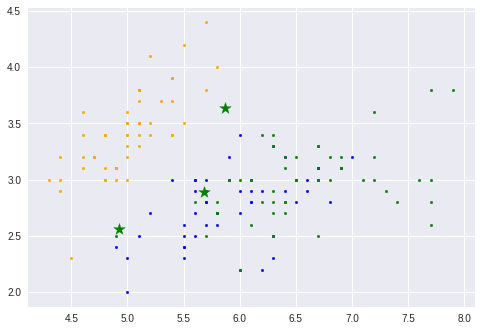

In [0]:
# Number of clusters
k = 3
# Number of training data
n = data.shape[0]
# Number of features in the data
c = data.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data, axis = 0)
std = np.std(data, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

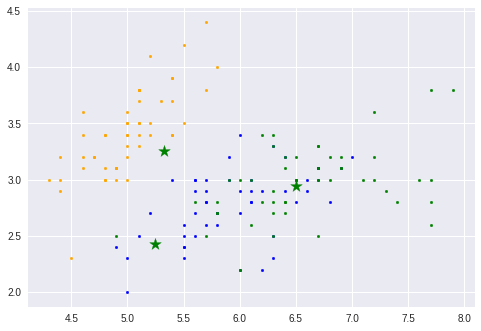

In [0]:
#Finding new Centers

centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data - centers[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)

# Plot the data and the centers generated using user define
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

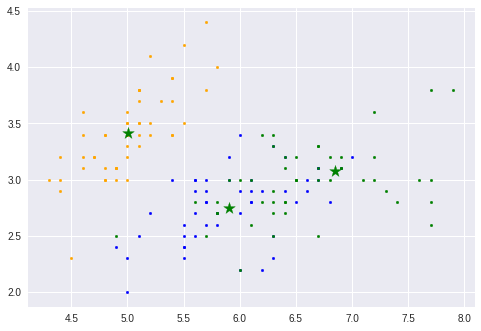

In [0]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
#print(kmeans.labels_)
# Plot the data and the centers generated using kmeans inbuilt
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data[i, 0], data[i,1], s=7, color = colors[int(category[i])])
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker='*', c='g', s=150)

In [0]:
centers_new

array([[5.32638889, 3.25694444, 2.29722222, 0.56527778],
       [6.49701493, 2.93880597, 5.33134328, 1.87910448],
       [5.24545455, 2.42727273, 3.74545455, 1.2       ]])

In [0]:
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [0]:
#inbuilt accuracy
predicted_class=[]
for i in range (n):
    #print(data[i])
    #print(centers_new)
    a,b,c=distance(data[i],kmeans.cluster_centers_)
   # print(a,b,c)
    clas=min(a,b,c)
    if(clas==a):
        predicted_class.append(1)
    elif(clas==b):
        predicted_class.append(0)
    elif(clas==c):
        predicted_class.append(2)

import numpy as np
from sklearn.metrics import accuracy_score
accuracy_inbuilt = accuracy_score(predicted_class, y_values)
print(accuracy_inbuilt)

0.8933333333333333


In [0]:
#userdefine accuracy
predicted_class=[]
for i in range (n):
    #print(data[i])
    #print(centers_new)
    a,b,c=distance(data[i],centers_new)
   # print(a,b,c)
    clas=min(a,b,c)
    if(clas==a):
        predicted_class.append(0)
    elif(clas==b):
        predicted_class.append(2)
    elif(clas==c):
        predicted_class.append(1)

#print(predicted_class)
import numpy as np
from sklearn.metrics import accuracy_score
accuracy_userdefine = accuracy_score(predicted_class, y_values)
print(accuracy_userdefine)

0.8533333333333334
